### Genre Exploration

In [21]:
# dependencies
import pandas as pd
from pathlib import Path
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
#import csv's
data_parq = Path("Resources/mo_movies_data.parquet")

data_df = pd.read_parquet(data_parq)

In [5]:
data_df

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0
...,...,...,...,...,...,...,...,...,...
2311,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",N/A,tt0453365,2196531,2411594.0
2312,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",N/A,tt0479751,12000000,19000000.0
2313,Dikari,2006,6.5,693.0,Comedy,N/A,tt0933361,800000,1328612.0
2314,Pro lyuboff,2010,5.8,297.0,Drama,N/A,tt1718881,2000000,1268793.0


In [6]:
# use str.contains() function to get genres - create action genre df
action_movies = data_df[data_df["Genre"].str.contains("Action")]
action_movies

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0
8,Elektra,2005,4.7,98572.0,"Action, Adventure, Crime","$24,409,722",tt0357277,43000000,56681566.0
11,Assault on Precinct 13,2005,6.3,82100.0,"Action, Crime, Drama","$20,040,895",tt0398712,30000000,35294470.0
13,Alone in the Dark,2005,2.4,47103.0,"Action, Horror, Sci-Fi","$5,178,569",tt0369226,20000000,10442808.0
19,Constantine,2005,7.0,376534.0,"Action, Fantasy, Horror","$75,976,178",tt0360486,100000000,230884728.0
...,...,...,...,...,...,...,...,...,...
2304,Black Rose,2014,2.8,2652.0,"Action, Crime, Drama",N/A,tt3266724,7000000,855450.0
2306,Battalion,2015,6.5,1703.0,"Action, Drama, History",N/A,tt4187590,10000000,7547762.0
2307,Fanaa,2006,7.1,35217.0,"Action, Drama, Romance","$2,105,352",tt0439662,5300000,22175908.0
2312,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",N/A,tt0479751,12000000,19000000.0


In [7]:
# create all the genre df's you want to explore here:
horror_movies = data_df[data_df["Genre"].str.contains("Horror")]
comedy_movies = data_df[data_df["Genre"].str.contains("Comedy")]
drama_movies = data_df[data_df["Genre"].str.contains("Drama")]
scifi_movies = data_df[data_df["Genre"].str.contains("Sci-Fi")]





In [13]:
# here's the entire list of genres to pull from:
data_df["Genre"].unique()

array(['Biography, Drama', 'Action, Adventure, Horror',
       'Drama, Fantasy, Mystery', 'Crime, Mystery, Thriller',
       'Horror, Mystery', 'Animation, Comedy, Crime',
       'Adventure, Comedy, Family', 'Drama, Horror, Mystery',
       'Action, Adventure, Crime', 'Adventure, Comedy, Drama',
       'Biography, Drama, Sport', 'Action, Crime, Drama',
       'Action, Horror, Sci-Fi', 'Comedy, Romance',
       'Documentary, Biography, History', 'Action, Fantasy, Horror',
       'Comedy, Drama, Family', 'Comedy, Horror', 'Action, Comedy, Drama',
       'Comedy, Crime, Music', 'Animation, Adventure, Comedy', 'Drama',
       'Crime, Thriller', 'Comedy', 'Action, Adventure, Comedy',
       'Comedy, Drama, Romance', 'Adventure, Comedy, Sci-Fi', 'Horror',
       'Action, Adventure, Drama', 'Horror, Thriller',
       'Action, Crime, Thriller', 'Action, Adventure, Fantasy',
       'Comedy, Family, Romance', 'Drama, Horror, Thriller',
       'Comedy, Crime, Sport', 'Biography, Drama, Romance',


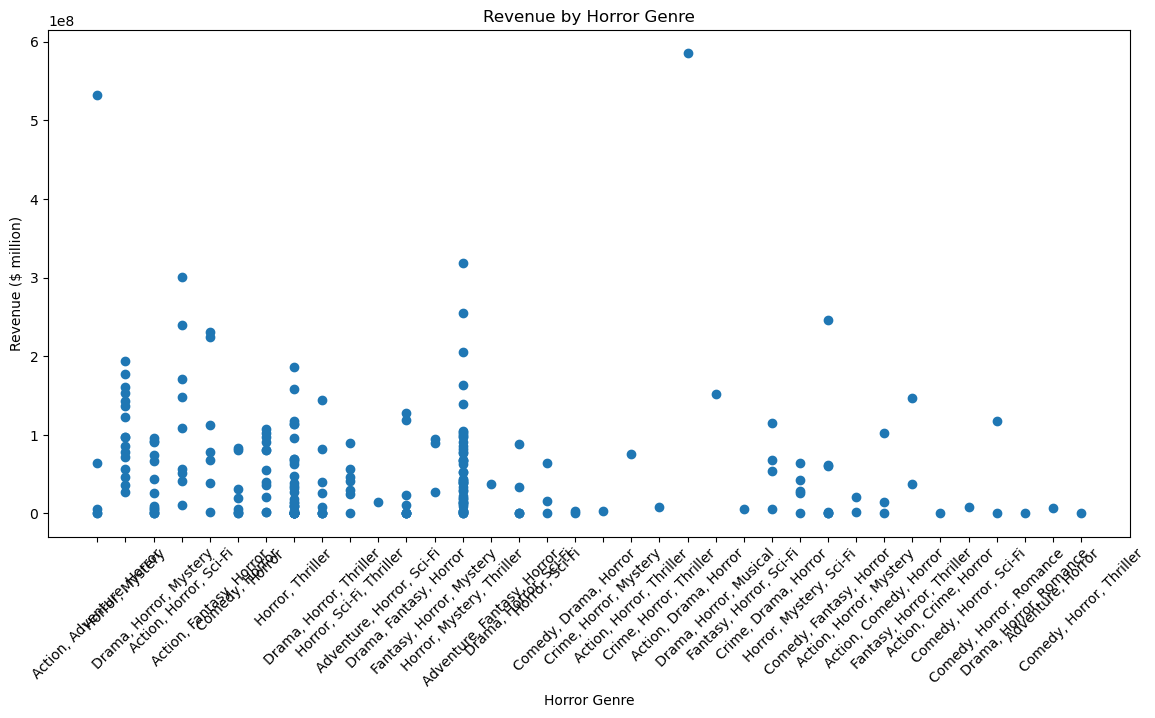

In [99]:
plt.figure(figsize=(12, 6))
plt.scatter(horror_movies['Genre'], horror_movies['Revenue'])
plt.xlabel('Horror Genre')
plt.ylabel('Revenue ($ million)')
plt.title('Revenue by Horror Genre')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

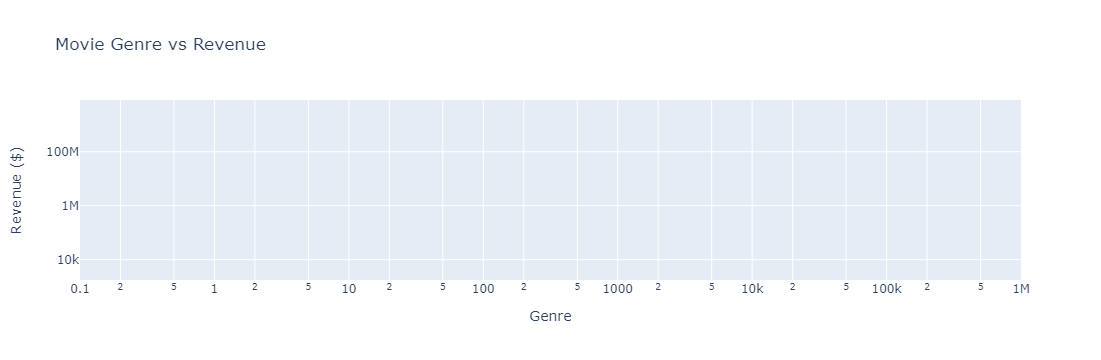

In [25]:
# Jack helps with this :D
data_df = data_df[['Title', 'Genre', 'Revenue']]
fig = px.scatter(data_df, x='Genre', y='Revenue', hover_name='Title',
                 log_x=True, log_y=True,
                 labels={'Genre': 'Genre', 'Revenue': 'Revenue ($)'},
                 title='Movie Genre vs Revenue')
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Times New Roman"
    )
)

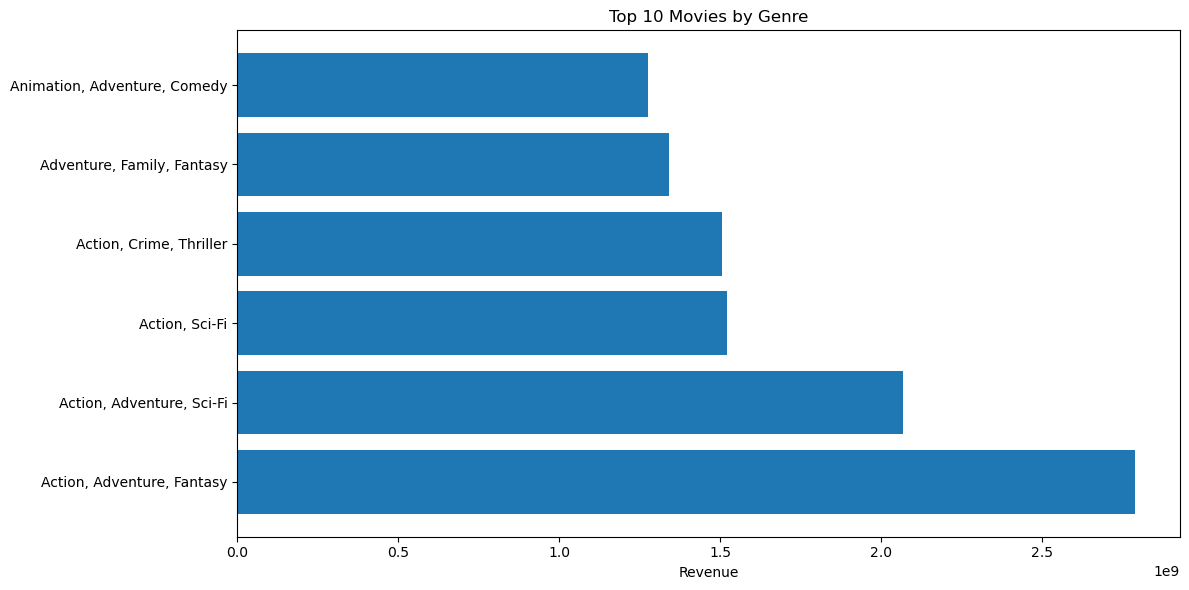

In [33]:
###Top genres by revenue
top_10_revenue = data_df.nlargest(10, 'Revenue')
plt.figure(figsize=(12, 6))
plt.barh(top_10_revenue['Genre'], top_10_revenue['Revenue'])
plt.title('Top Earning Genres')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

Code and notes

In [ ]:
# Below, I tried to use a for loop for creating each genre df for us. It was annoying and complicated,
# then i found the str.contains() function with is very simple. So I'd recommend using that to create genre df's for 
# each genre you want to explore

In [53]:
# # use loop for creating genres dictionary?
# genre_df = {}

# # Create a DataFrame for each year
# for genre in data_df['Genre']:
#     genre_df = data_df[data_df['Genre'].isin([genre])]
#     genre_dataframes[genre] = genre_df

# # Access the DataFrame for a specific year
# genre_action_df = genre_dataframes.get(Action)

In [ ]:
# https://stackoverflow.com/questions/19169649/how-to-use-str-contains-with-multiple-expressions-in-pandas-dataframes

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html#pandas.DataFrame.isin

In [ ]:
# https://www.geeksforgeeks.org/difference-between-list-vs-set-vs-tuple-in-python/

In [55]:
# tried using is but had errors. str.contains() worked better
# action_df = data_df[data_df["Action"].isin["Genre"]]
# action_df